In [56]:
# 1. Import Required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [57]:
# 2. Load the Dataset
df = pd.read_csv("titanic.csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [58]:
# 3. Explore the Dataset
print(df.info())
print("\nNull Values:\n", df.isnull().sum())
print("\nStatistical Summary:\n", df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Null Values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked       

In [59]:
# 4. Handle Missing Values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df.drop(columns=['Cabin'], inplace=True)  # Too many missing values


<ipython-input-59-20d32b280ade>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
<ipython-input-59-20d32b280ade>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

In [60]:
# 5. Encode Categorical Variables
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)


In [61]:
# 6. Standardize Numerical Features
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])


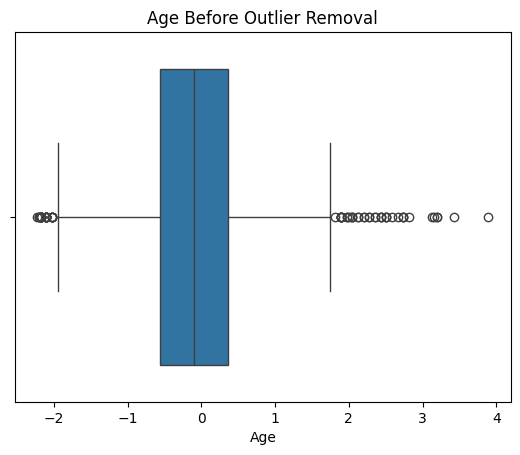

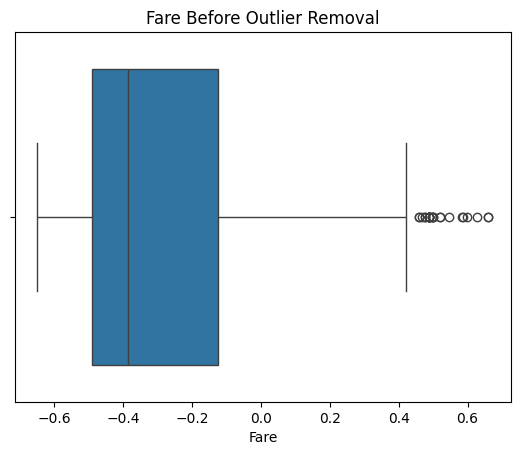

In [68]:
# 7.Boxplot for 'Fare' and 'Age'

# Boxplot for Age
sns.boxplot(x='Age', data=df)
plt.title("Age Before Outlier Removal")
plt.show()

# Boxplot for Fare
sns.boxplot(x='Fare', data=df)
plt.title("Fare Before Outlier Removal")
plt.show()



In [70]:
# 8. Remove Outliers from 'Fare' and 'Age' using IQR method

# For Fare
Q1_fare = df['Fare'].quantile(0.25)
Q3_fare = df['Fare'].quantile(0.75)
IQR_fare = Q3_fare - Q1_fare
lower_fare = Q1_fare - 1.5 * IQR_fare
upper_fare = Q3_fare + 1.5 * IQR_fare

# For Age
Q1_age = df['Age'].quantile(0.25)
Q3_age = df['Age'].quantile(0.75)
IQR_age = Q3_age - Q1_age
lower_age = Q1_age - 1.5 * IQR_age
upper_age = Q3_age + 1.5 * IQR_age

# Filter out rows with outliers in Fare or Age
df = df[(df['Fare'] >= lower_fare) & (df['Fare'] <= upper_fare)]
df = df[(df['Age'] >= lower_age) & (df['Age'] <= upper_age)]



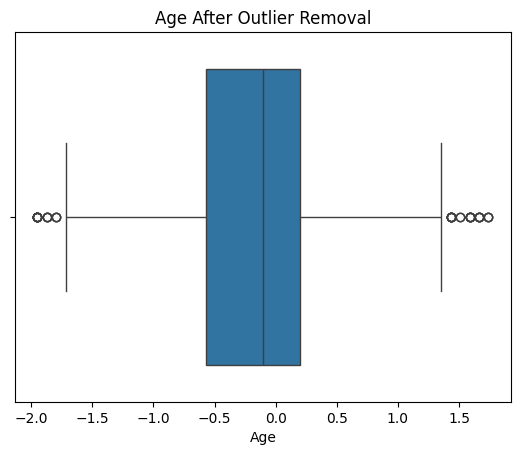

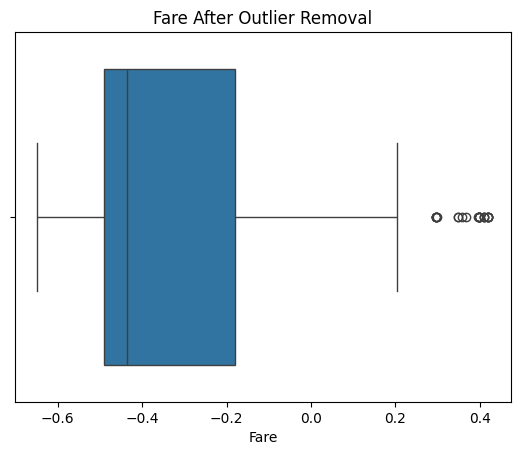

In [71]:
# 9.Boxplot for 'Fare' And 'Age'

# Boxplot for Age
sns.boxplot(x='Age', data=df)
plt.title("Age After Outlier Removal")
plt.show()

# Boxplot for Fare
sns.boxplot(x='Fare', data=df)
plt.title("Fare After Outlier Removal")
plt.show()



In [72]:
# 10. Final Cleaned Dataset Preview
print("Final Dataset Shape:", df.shape)
df.head()


Final Dataset Shape: (685, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,-0.565736,1,0,A/5 21171,-0.502445,False,True
2,3,1,3,"Heikkinen, Miss. Laina",1,-0.258337,0,0,STON/O2. 3101282,-0.488854,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0.433312,1,0,113803,0.420730,False,True
4,5,0,3,"Allen, Mr. William Henry",0,0.433312,0,0,373450,-0.486337,False,True
5,6,0,3,"Moran, Mr. James",0,-0.104637,0,0,330877,-0.478116,True,False


# Summary of Steps Performed

- Imported necessary libraries  
- Loaded and explored the Titanic dataset  
- Handled missing values (`Age`, `Embarked`, dropped `Cabin`)  
- Encoded categorical variables (`Sex`, `Embarked`)  
- Standardized numerical features (`Age`, `Fare`)  
- Removed outliers from `Fare` using the IQR method  
- Previewed the final cleaned dataset
